# 10 - Desafio

## Analisando dados de roubos de celular

Algumas perguntas com relação ao dataset podem ser respondidas
- Como os roubos de celular evoluíram em relação ao tempo e como podem evoluir nos próximos anos?
- Quais são os períodos mais perigosos?
- Quais são os logradouros, tipos de locais, bairros e regiões com maiores índices de roubos de celular?
- Quais os veículos mais visados pelos ladrões para roubar um celular de dentro de um veículo?

Dataset disponível em: http://www.ssp.sp.gov.br/transparenciassp/Default.aspx

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura dos dados
xlsx = pd.ExcelFile('Feminicidio_2015_2022.xlsx')
df_2022 = pd.read_excel(xlsx, sheet_name=7)
df_2022

/home/david/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,DECAP,8ª SEC,São Paulo,054 DP - Cidade Tiradentes,1.0,1,20249,1,2022,2022-01-30 16:02:00,...,NaN,NaN,Vítima,Feminino,58.0,1963-08-01,Branca,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
1,DECAP,7ª SEC,São Paulo,103 DP - Cohab Itaquera,1.0,1,10326,1,2022,2022-01-04 00:00:00,...,NaN,NaN,Vítima,Feminino,77.0,1944-06-22,Branca,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
2,DECAP,5ª SEC,São Paulo,018 DP - Alto da Moóca,1.0,1,20218,1,2022,2022-01-10 11:25:00,...,-23.555115,-46.604235,Vítima,Feminino,51.0,1970-06-07,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
3,DECAP,4ª SEC,São Paulo,074 DP - Jaraguá,1.0,1,20103,1,2022,2022-01-04 00:00:00,...,NaN,NaN,Vítima,Feminino,47.0,1974-01-28,Parda,AUXILIAR DE LIMPEZA,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
4,DEINTER 2,2ª Seccional Campinas,Campinas,009 DP - Campinas,NaN,1,70367,1,2022,2022-01-18 00:00:00,...,NaN,NaN,Vítima,Feminino,3.0,2018-11-13,Branca,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,DEMACRO,SEC Guarulhos,Guarulhos,004 DP - Guarulhos,1.0,1,30212,12,2022,2022-12-09 00:00:00,...,-23.439885,-46.409521,Vítima,Feminino,28.0,1994-08-18,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
191,DEMACRO,SEC Guarulhos,Guarulhos,006 DP - Guarulhos,1.0,1,30216,12,2022,2022-12-07 00:00:00,...,-23.448946,-46.507070,Vítima,Feminino,37.0,1984-12-08,Parda,OUTROS,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
192,DEMACRO,SEC Guarulhos,Guarulhos,009 DP - Guarulhos,1.0,1,30217,12,2022,2022-12-28 00:00:00,...,NaN,NaN,Vítima,Feminino,28.0,1994-06-21,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...
193,DEMACRO,SEC Mogi das Cruzes,Ferraz de Vasconcelos,001 DP - Ferraz de Vasconcelos,1.0,1,30302,12,2022,2022-12-29 00:00:00,...,NaN,NaN,Vítima,Feminino,2.0,2020-09-01,Parda,NaN,HOMICÍDIO DOLOSO,Feminicídio-contra a mulher por razões da cond...


## Pré-processamento

Antes de analisar, caso necessário, realiza um procedimento de limpeza de dados, como remover duplicados, tratar strings, converter dados para outros formatos, criar novas colunas como dia do mês, da semana e mês.

**P.S.**: *Essa pode ser a fase mais demorada de todo o desafio.*

In [83]:
# REMOVENDO DADOS DUPLICADOS
df_2022.drop_duplicates()

# FILTRANDO DADOS DE S. PAULO
SP = df_2022["MUNICIPIO_ELABORACAO"] == "S.PAULO"
df_sp = df_2022[SP]

# TRANSFORMANDO STRINGS PARA LOWER CASE, PADRONIZANDO STRING
str_cols = ['DEPARTAMENTO_CIRCUNSCRICAO', 'SECCIONAL_CIRCUNSCRICAO',
       'MUNICIPIO_CIRCUNSCRICAO', 'DP_CIRCUNSCRICAO ', 'MUNICIPIO_ELABORACAO',
       'DP_ELABORACAO', 'SEC_ELABORACAO', 'DEP_ELABORACAO', 'DESC_TIPOLOCAL', 'LOGRADOURO', 'TIPO_PESSOA', 'SEXO_PESSOA', 'COR_PELE', 'PROFISSAO', 'NATUREZA_APURADA',
       'DESDOBRAMENTO']

for col in str_cols:
    df_sp[col] = df_sp[col].str.lower()

df_sp

# TRANSFORMANDO DADOS TEMPORAIS NO TIPO APROPRIADO
# --- Pandas já fez isso automaticamente S2

/tmp/ipykernel_2654/2775588613.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sp[col] = df_sp[col].str.lower()


,DEPARTAMENTO_CIRCUNSCRICAO,SECCIONAL_CIRCUNSCRICAO,MUNICIPIO_CIRCUNSCRICAO,DP_CIRCUNSCRICAO,HD,Nº DE VÍT HD,ID_DELEGACIA,MÊS ESTATISTICA,ANO ESTATISTICA,DATAHORA_REGISTRO_BO,...,LATITUDE,LONGITUDE,TIPO_PESSOA,SEXO_PESSOA,IDADE_PESSOA,DATA_NASCIMENTO_PESSOA,COR_PELE,PROFISSAO,NATUREZA_APURADA,DESDOBRAMENTO
0,decap,8ª sec,são paulo,054 dp - cidade tiradentes,1.0,1,20249,1,2022,2022-01-30 16:02:00,...,NaN,NaN,vítima,feminino,58.0,1963-08-01,branca,NaN,homicídio doloso,feminicídio-contra a mulher por razões da cond...
1,decap,7ª sec,são paulo,103 dp - cohab itaquera,1.0,1,10326,1,2022,2022-01-04 00:00:00,...,NaN,NaN,vítima,feminino,77.0,1944-06-22,branca,NaN,homicídio doloso,feminicídio-contra a mulher por razões da cond...
2,decap,5ª sec,são paulo,018 dp - alto da moóca,1.0,1,20218,1,2022,2022-01-10 11:25:00,...,-23.555115,-46.604235,vítima,feminino,51.0,1970-06-07,parda,NaN,homicídio doloso,feminicídio-contra a mulher por razões da cond...
3,decap,4ª sec,são paulo,074 dp - jaraguá,1.0,1,20103,1,2022,2022-01-04 00:00:00,...,NaN,NaN,vítima,feminino,47.0,1974-01-28,parda,auxiliar de limpeza,homicídio doloso,feminicídio-contra a mulher por razões da cond...
20,decap,6ª sec,são paulo,092 dp - parque santo antônio,1.0,1,10247,2,2022,2022-02-09 00:00:00,...,NaN,NaN,vítima,feminino,26.0,1995-07-25,branca,NaN,homicídio doloso,feminicídio-contra a mulher por razões da cond...
21,decap,4ª sec,são paulo,073 dp - jaçanã,1.0,1,10336,2,2022,2022-02-20 00:00:00,...,NaN,NaN,vítima,feminino,37.0,1984-07-17,branca,NaN,homicídio doloso,feminicídio-contra a mulher por razões da cond...
31,decap,7ª sec,são paulo,024 dp - ponte rasa,1.0,1,20224,3,2022,2022-03-18 00:00:00,...,NaN,NaN,vítima,feminino,54.0,1967-05-17,branca,aposentado(a),homicídio doloso,feminicídio-contra a mulher por razões da cond...
50,decap,7ª sec,são paulo,024 dp - ponte rasa,1.0,1,20210,4,2022,2022-04-28 00:00:00,...,NaN,NaN,vítima,feminino,36.0,1986-01-21,preta,prendas domesticas,homicídio doloso,feminicídio-contra a mulher por razões da cond...
51,decap,6ª sec,são paulo,085 dp - jardim mirna,1.0,1,10374,4,2022,2022-04-01 00:00:00,...,-23.757368,-46.678922,vítima,feminino,35.0,1986-05-02,parda,NaN,homicídio doloso,feminicídio-contra a mulher por razões da cond...
52,decap,4ª sec,são paulo,074 dp - jaraguá,1.0,1,20103,4,2022,2022-04-11 00:00:00,...,-23.451816,-46.710582,vítima,feminino,40.0,1981-07-22,branca,comerciante,homicídio doloso,feminicídio-contra a mulher por razões da cond...


## Análise Exploratória

Agora é a hora de descobrir relações e algumas *hidden informations* no meio das linhas do dataset.

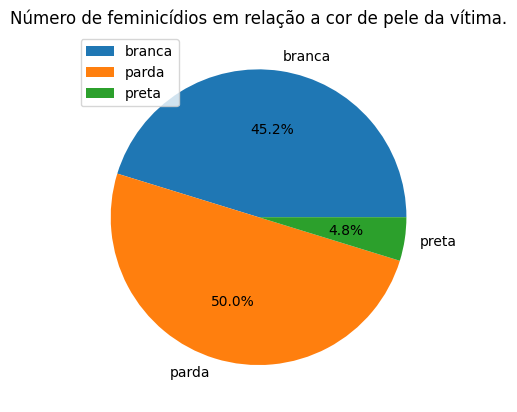

In [84]:
# Gráfico pizza: mortes em relação a cor de pele da vítima
cor_de_pele = sorted(list(set(df_sp["COR_PELE"])))
valores = df_sp.groupby("COR_PELE").size()
# Mostrando o gráfico
plt.pie(x = valores, labels = cor_de_pele, autopct='%1.1f%%')
plt.title("Número de feminicídios em relação a cor de pele da vítima.")
plt.legend()
plt.show()


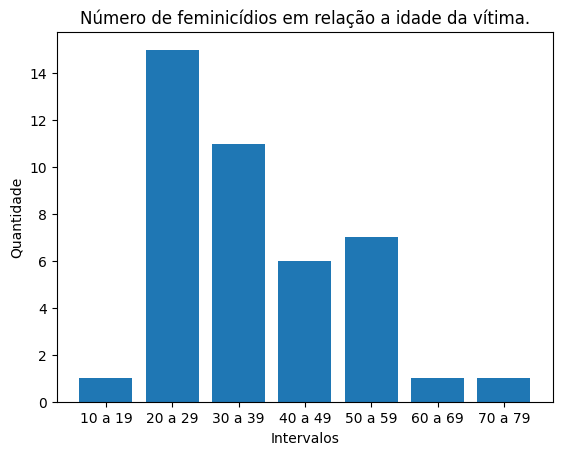

In [85]:
# Gráfico de mortes por intervalo de idade
idades = sorted(list(df_sp["IDADE_PESSOA"]))
intervalos = [f'{x} a {x + 9}' for x in sorted(list(set([int(i // 10) * 10 for i in idades])))]
quantidades = [0] * len(intervalos)

for i in idades:
    quantidades[int(i // 10) - 1] += 1

# Mostrando o gráfico
plt.bar(intervalos, quantidades, label=intervalos)
plt.title("Número de feminicídios em relação a idade da vítima.")
plt.ylabel("Quantidade")
plt.xlabel("Intervalos")
plt.show()

/home/david/.local/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


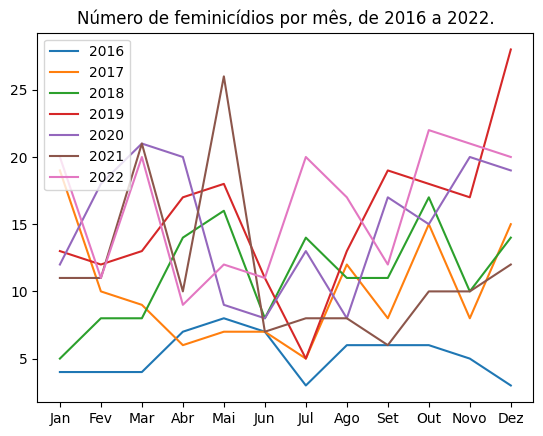

In [86]:
# Número de feminicídios por mês, de 2016 a 2022.
from datetime import datetime

meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Novo', 'Dez']
anos = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
]

for i in range(1, len(xlsx.sheet_names)):
    sheet = pd.read_excel(xlsx, sheet_name = i)
    for date in sheet["DATA_FATO"]:
        m_index = datetime.date(date).month - 1
        anos[i - 1][m_index] += 1

# Mostrando o gráfico
plt.plot(meses, anos[0], label = "2016")
plt.plot(meses, anos[1], label = "2017")
plt.plot(meses, anos[2], label = "2018")
plt.plot(meses, anos[3], label = "2019")
plt.plot(meses, anos[4], label = "2020")
plt.plot(meses, anos[5], label = "2021")
plt.plot(meses, anos[6], label = "2022")
plt.title("Número de feminicídios por mês, de 2016 a 2022.")
plt.legend(loc='upper left')
plt.show()